#### Avaliação de Desempenho de Estratégias de Compra e Venda de Ativos Financeiros

Aqui são descritos os scripst utilizados para a avaliação experimental do trabalho de monografia entitulado Avaliação de Desempenho de Estratégias de Compra e Venda de Ativos Financeiros, defendido pelo docente Adilio Rosa em 06/2019.

Foi empregada a linguagem de programação R para coletar os dados de histórico de preços de ativos financeiros na forma de CSV e carregá-los para a memória, após limpeza de dados. Também foram aplicadas regras de Análise Técnica (SMA, MACD e RSI) para gerar sinais de compra e venda e com isso compor estratégias, que serão avaliadas segundo sua capacidade de gerar retorno financeiro.

In [ ]:
################################################################################################ 
#   O trecho de código abaixo carrega o CSV com histórico de preços, realiza limpeza de dados
# e carrega para a memória, em um data frame.
################################################################################################

# Remove todos os objetos do workspace
rm(list = ls())

# Carrega a biblioteca de análise técnica
require(TTR)

# Carrega os scripts necessários para gerar e avaliar as estratégias
source("https://raw.githubusercontent.com/AdilioR/tccs/master/adiliorosa/scripts/Asset.R")
source("https://raw.githubusercontent.com/AdilioR/tccs/master/adiliorosa/scripts/Result.R")
source("https://raw.githubusercontent.com/AdilioR/tccs/master/adiliorosa/scripts/TechnicalAnalysis.r")
source("https://raw.githubusercontent.com/AdilioR/tccs/master/adiliorosa/scripts/Main.R")

# Prepara os dados caso sejam empregados subconjuntos do dataset original
setup <- function()
{
    Asset.First_Date <<- Asset.TransactionList$Date[1]
    Asset.Last_Date <<- Asset.TransactionList$Date[nrow(Asset.TransactionList)]
    rm(list=ls(pattern="Result."))
}

asset.name <<- "ABEV3.SA"

# Carrega o CSV para a memória
Main.loadCsvIntoWorkspace(asset.name, csv_fullpath = "https://raw.githubusercontent.com/AdilioR/tccs/adilio/adiliorosa/rworkingdirectory/ABEV3.SA.csv", as.Date("1970-01-01"), header = TRUE, sep = ",")


In [40]:
# Data frame com o histórico de preços:

row.names(Asset.TransactionList) <- c()
Asset.TransactionList

Date,Open,High,Low,Close,Adj_Close,Volume
2010-06-09,6.19305,6.23221,6.13152,6.21383,2.965097,1979719
2010-06-10,6.28095,6.29294,6.23300,6.23700,2.976154,3231122
2010-06-11,6.23300,6.23300,6.19305,6.20583,2.961280,182705
2010-06-14,6.28694,6.29334,6.20823,6.23340,2.974436,327868
2010-06-15,6.23300,6.35287,6.23300,6.34887,3.029534,232761
2010-06-16,6.34248,6.43278,6.34248,6.39282,3.050507,415466
2010-06-17,6.41120,6.43158,6.29533,6.43158,3.069002,337879
2010-06-18,6.39282,6.42439,6.31451,6.42439,3.065572,4605
2010-06-21,6.46874,6.53467,6.39722,6.45276,3.079109,573143
2010-06-22,6.45276,6.57182,6.45276,6.56663,3.133445,1709416


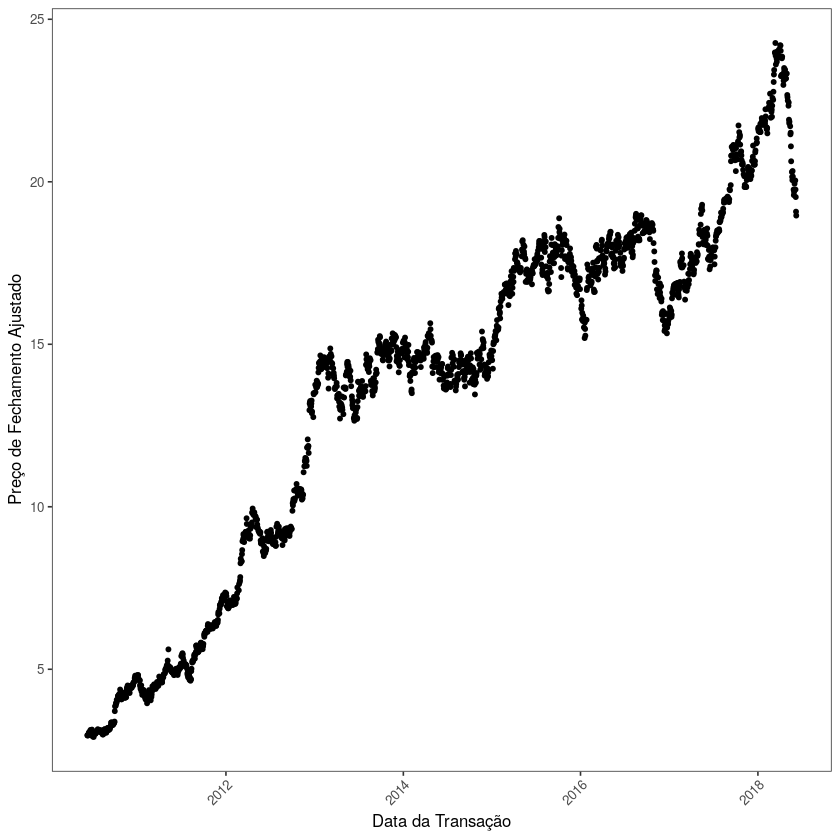

In [48]:
# Gráfico usando preço de fechamento ajustado:

source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")

col_set <- brewer.pal(11, 'Spectral')
col_2 <- col_set[c(4,9)]
col_2b <- col_set[c(9,3)]    
col_3 <- col_set[c(4,9,11)]
col_4 <- col_set[c(3,5,7,9)]

DrawScatterPlotPrices <- function()
{
    Asset.TransactionList.simpleline <<- Asset.TransactionList
    Asset.TransactionList.simpleline$variable <- "transaction"

    names(Asset.TransactionList.simpleline)[names(Asset.TransactionList.simpleline) == "Date"] <- "x"
    names(Asset.TransactionList.simpleline)[names(Asset.TransactionList.simpleline) == "Adj_Close"] <- "value"

    grf <- simpleplot.scatter(Asset.TransactionList.simpleline %>% filter(variable %in% c('transaction')), 
                     colors="black", label_x = "Data da Transação", label_y = "Preço de Fechamento Ajustado") 
    grf <- grf + theme(axis.text.x = element_text(angle=45, hjust=1))

    plot(grf)
}

simpleplot.scatter <- function(series, label_series = "", label_x = "", label_y = "", colors = NULL) {
    grf <- ggplot(data=series) + geom_point(aes(x = x, y = value, colour=variable), size=1)
    if (!is.null(colors)) {
        grf <- grf + scale_color_manual(values=colors)
    }
    grf <- grf + labs(color=label_series)
    grf <- grf + xlab(label_x)
    grf <- grf + ylab(label_y)
    grf <- grf + theme_bw(base_size = 10)
    grf <- grf + theme(panel.grid.major = element_blank()) + theme(panel.grid.minor = element_blank()) 
    grf <- grf + theme(legend.position = "none") + theme(legend.key = element_blank()) 
    return(grf)
}

DrawScatterPlotPrices()

A seguir, a geração dos sinais de compra e venda e a avaliação sobre a rentabilidade de cada estratégia.
Para fins de demonstração, utilizamos:

* nFast de 10 a 25, de 5 em 5. Na monografia, nFast de 1 a 199, de 1 em 1;
* nSlow de 11 a 36, de 5 em 5. Na monografia, nSlow de 2 a 200, de 1 em 1;
* MaLength (RSI) de 9 a 12. Na monografia, MaLength de 9 a 30;
* As demais faixas de valores estão como na monografia.

In [64]:
start <- function(sample.name)
{

    # SMA
    for(nFast in seq(from=10, to=25, by=5))
    {
        for(nSlow in seq(from=(nFast + 1), to=36, by=5))
        {
            predicted_decision_list <- TechnicalAnalysis.getDecisionList.SMA(nFast, nSlow) #lista ok
            Main.setStrategyResults(asset.name = asset.name, asset.transaction_list.prices = Asset.TransactionList$Adj_Close, asset.transaction_list.dates = Asset.TransactionList$Date, strategy_name = "SMA", strategy_details = paste("long-", nSlow, "_short-", nFast, sep = ""), predicted_decision_list = predicted_decision_list, percent_train = 0.8)
        }
    }
  
    # MACD
    for(nFast in seq(from=10, to=25, by=5))
    {
        for(nSlow in seq(from=(nFast + 1), to=36, by=5))
        {
            nSig <- 9
            predicted_decision_list <- TechnicalAnalysis.getDecisionList.MACD(nFast, nSlow, nSig)
            Main.setStrategyResults(asset.name = asset.name, asset.transaction_list.prices = Asset.TransactionList$Adj_Close, asset.transaction_list.dates = Asset.TransactionList$Date, strategy_name = "MACD", strategy_details = paste("long-", nSlow, "_short-", nFast, "_nsig-", nSig, sep = ""), predicted_decision_list = predicted_decision_list, percent_train = 0.8)
      
        }
    }
  
    # RSI
    for(MALength in seq(from=9, to=12, by=1))
    {
   
        for(nivelInferior in seq(from=30, to=35, by=1))
        {
   
            for(nivelSuperior in seq(from=60, to=65, by=1))
            {
                predicted_decision_list <- TechnicalAnalysis.getDecisionList.RSI(MALength, nivelInferior, nivelSuperior)
                Main.setStrategyResults(asset.name = asset.name, asset.transaction_list.prices = Asset.TransactionList$Adj_Close, asset.transaction_list.dates = Asset.TransactionList$Date, strategy_name = "RSI", strategy_details = paste("MAType-", "SMA_", "MaLength-", MALength, "_inf-level-", nivelInferior, "_sup-level-", nivelSuperior, sep = ""), predicted_decision_list = predicted_decision_list, percent_train = 0.8)
            }
        }
    }
  
    Main.avoidFactors()
    save.image(file = paste(asset.name, sample.name, "workspace.RData", sep = "_"))
    print(paste("Finalizado as: ", Sys.time()))
  
}

start("FullSample")

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail

In [62]:
# Ao fim do processo anterior, é gerado outro data frame, com a lista de estratégias:

row.names(Result.StrategyList) <- c()
Result.StrategyList

strategy_name,strategy_details,mean_return_train,mean_return_test,median_return_train,median_return_test,min_return_train,min_return_test,max_return_train,max_return_test,firstqt_return_train,firstqt_return_test,thirdqt_return_train,thirdqt_return_test,sd_return_train,sd_return_test,cumulative_return_train,cumulative_return_test,quantity_operation_train,quantity_operation_test
SMA,long-11_short-10,0.007700699,0.009134009,3.881556e-03,0.0038920940,-0.08511983,-0.032276034,0.2197837,0.12633837,-0.01268000,-0.0043187356,0.01823052,0.01921333,0.04326261,0.03037445,1.3581110,0.27481222,126,28
SMA,long-16_short-10,0.019152457,0.029037966,2.723716e-05,0.0236706657,-0.07267165,-0.052869441,0.3712242,0.16985249,-0.03010780,0.0008263159,0.01778317,0.04503510,0.08943986,0.06313063,1.3976116,0.30966129,56,10
SMA,long-21_short-10,0.027731158,0.032838240,-1.354066e-02,0.0373918868,-0.06405026,-0.046532876,0.3697406,0.15515347,-0.02962687,-0.0055586153,0.01340458,0.05149848,0.11072400,0.06351945,1.5015821,0.27824598,41,8
SMA,long-26_short-10,0.038538109,0.098421397,-9.165056e-03,0.1067555973,-0.05777989,0.020352048,0.4755264,0.15982235,-0.03449094,0.0465577293,0.02299937,0.15861927,0.12448444,0.07141574,2.0329217,0.44645508,35,4
SMA,long-31_short-10,0.039537612,0.077452670,-1.800020e-02,0.0838575455,-0.05972740,0.021452250,0.4599762,0.12064334,-0.03916993,0.0462144840,0.01622508,0.11509573,0.14354457,0.04764784,1.5968713,0.34372522,31,4
SMA,long-36_short-10,0.042359268,0.073059672,-1.702181e-02,0.0840480951,-0.07407480,0.009475966,0.5508127,0.11466653,-0.04221895,0.0490035722,0.03240484,0.10810419,0.15091022,0.04820783,1.6770009,0.32178638,30,4
SMA,long-16_short-15,0.011097179,0.017751813,-6.643703e-04,0.0055308688,-0.04931687,-0.047750272,0.3877400,0.18503926,-0.01810958,-0.0066685640,0.01321358,0.03055260,0.06223360,0.05145579,1.7577383,0.36694648,108,19
SMA,long-21_short-15,0.021949477,0.031128473,-6.026532e-03,0.0211816589,-0.06525671,-0.059093026,0.3832186,0.19644834,-0.03159011,-0.0234800419,0.02110441,0.05123169,0.09354352,0.08022927,1.4654331,0.28729745,50,9
SMA,long-26_short-15,0.035215924,0.088081622,-1.374404e-03,0.0815721612,-0.07186576,0.045504375,0.3367724,0.14367779,-0.03196270,0.0519309753,0.04136654,0.11772281,0.10974951,0.04655066,1.9080865,0.39784723,36,4
SMA,long-31_short-15,0.046062522,0.074517040,-1.292465e-02,0.0731192207,-0.07312495,0.020658855,0.5729814,0.13117086,-0.03877000,0.0401647822,0.04452401,0.10747148,0.15212155,0.05004576,1.7682554,0.32874241,28,4


In [41]:
# Algumas informações gerais sobre o período analisado, geradas no processo anterior:

# Nome do ativo
Asset.Name

# Primeiro dia presente no dataset
Asset.First_Date

# Último dia presente no dataset
Asset.Last_Date

# Tipo de dataset de preços (diário, semanal, 30 min, 1h, etc)
Asset.Frequency

# Resultado de Buy and Hold dentro da amostra:
Result.Train.Buy_and_Hold_Return

# Resultado de Buy and Hold fora da amostra:
Result.Test.Buy_and_Hold_Return

[1] "ABEV3.SA"

[1] "2010-06-09"

[1] "2018-06-08"

[1] "daily"

[1] 4.912612

[1] 0.1074638

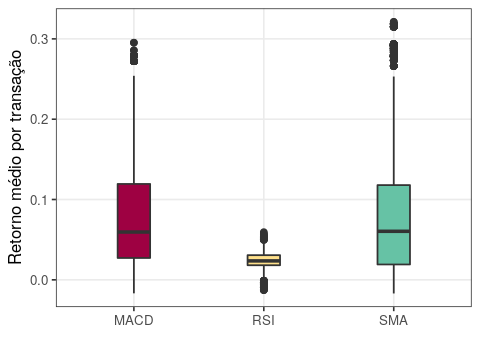

In [60]:
# Gráfico em boxplot, mostrando retorno médio por transação dos indicadores:

DrawBoxPlotRetornoMedio <- function()
{

    mycolors <- col_set[c(1,5,9)]

    dataviz_average_return_train <<- subset(Result.StrategyList, as.integer(quantity_operation_train) > 0 & as.integer(quantity_operation_test) > 0, select=c(strategy_name, mean_return_train))

    names(dataviz_average_return_train)[names(dataviz_average_return_train) == "strategy_name"] <<- "variable"
    names(dataviz_average_return_train)[names(dataviz_average_return_train) == "mean_return_train"] <<- "value"

    dataviz_average_return_train$value <<- as.double(dataviz_average_return_train$value)

    as.data.frame(dataviz_average_return_train)

    grfb <<- plot.boxplot(dataviz_average_return_train, colors=mycolors, label_y="Retorno médio por transação")
    options(repr.plot.width=4, repr.plot.height=3)
    plot(grfb)
}
DrawBoxPlotRetornoMedio()

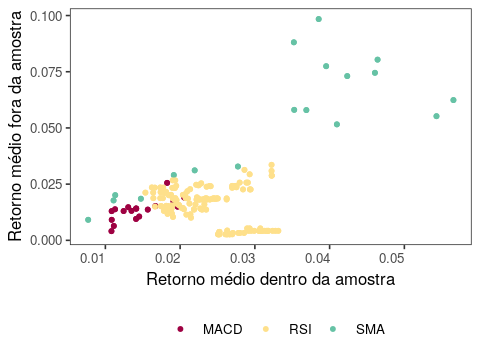

In [52]:
# Scatterplot para mostrar possíveis correlações de desempenho dentro e fora da amostra, quanto ao retorno médio:

DrawScatterPlotRetornoMedioDentroForaAmostra <- function()
{
    mycolors <- col_set[c(1,5,9)]

    Asset.TransactionList.scatterplot <<- Result.StrategyList

    names(Asset.TransactionList.scatterplot)[names(Asset.TransactionList.scatterplot) == "mean_return_train"] <<- "x"
    names(Asset.TransactionList.scatterplot)[names(Asset.TransactionList.scatterplot) == "mean_return_test"] <<- "value"
    names(Asset.TransactionList.scatterplot)[names(Asset.TransactionList.scatterplot) == "strategy_name"] <<- "variable"

    grf <- plot.scatter(Asset.TransactionList.scatterplot %>% filter(variable %in% c('SMA', 'MACD', 'RSI')), 
            colors=mycolors, label_x = "Retorno médio dentro da amostra", label_y = "Retorno médio fora da amostra") 
    grf <- grf + theme(axis.text.x = element_text(angle=0, hjust=1))

    plot(grf)
}

DrawScatterPlotRetornoMedioDentroForaAmostra()

In [53]:
# Testes de correlação de desempenho dentro e fora da amostra, quanto ao retorno médio:

cor.test(Result.StrategyList$mean_return_train, Result.StrategyList$mean_return_test, method='kendal', alternative='two.sided', exact=FALSE)
cor.test(Result.StrategyList$mean_return_train, Result.StrategyList$mean_return_test, method='spearman', alternative='two.sided', exact=FALSE)
cor.test(Result.StrategyList$mean_return_train, Result.StrategyList$mean_return_test, method='pearson', alternative='two.sided', exact=FALSE)


	Kendall's rank correlation tau

data:  Result.StrategyList$mean_return_train and Result.StrategyList$mean_return_test
z = 2.2715, p-value = 0.02311
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.08098507 



	Spearman's rank correlation rho

data:  Result.StrategyList$mean_return_train and Result.StrategyList$mean_return_test
S = 7149524, p-value = 0.1271
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08055822 



	Pearson's product-moment correlation

data:  Result.StrategyList$mean_return_train and Result.StrategyList$mean_return_test
t = 10.463, df = 358, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4005866 0.5592987
sample estimates:
      cor 
0.4839119 


In [54]:
# Para extrair subconjuntos do dataset original de preços, é possível se fazer utilizando:

subsample1 <- Asset.TransactionList[c(1 : (round(NROW(Asset.TransactionList) * 0.25, digits = 0))),]
subsample2 <- Asset.TransactionList[c((round(NROW(Asset.TransactionList) * 0.25, digits = 0) + 1) : (round(NROW(Asset.TransactionList) * 0.50, digits = 0))),]
subsample3 <- Asset.TransactionList[c((round(NROW(Asset.TransactionList) * 0.50, digits = 0) + 1) : (round(NROW(Asset.TransactionList) * 0.75 + 1, digits = 0))),]
subsample4 <- Asset.TransactionList[c((round(NROW(Asset.TransactionList) * 0.75, digits = 0) + 2) : (NROW(Asset.TransactionList))),]

start("FullSample")

Asset.TransactionList <- subsample1
rm(subsample1)
setup()
start("Subsample1")

Asset.TransactionList <- subsample2
rm(subsample2)
setup()
start("Subsample2")

Asset.TransactionList <- subsample3
rm(subsample3)
setup()
start("Subsample3")

Asset.TransactionList <- subsample4
rm(subsample4)
setup()
start("Subsample4")

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail

[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-11_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-10"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-16_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-36_short-15"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-21_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-26_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_details:long-31_short-20"
[1] "asset:ABEV3.SA;strategy:SMA;strategy_detail